# Chest X-Ray Pneumonia – Data Exploration

Goals:
- Inspect dataset structure and class balance across train/val/test.
- Visualize class distributions.
- Preview sample images from NORMAL and PNEUMONIA classes.

> Make sure `data/chest_xray/` exists before running. Figures are saved to `results/` with 300 DPI.


In [1]:
import os
from pathlib import Path
import random
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from PIL import Image

sns.set_theme(style="whitegrid")
plt.rcParams["figure.dpi"] = 120  # on-screen; saving handled per-figure


ModuleNotFoundError: No module named 'matplotlib'

In [ ]:
# Paths
PROJECT_ROOT = Path.cwd()
DATA_DIR = PROJECT_ROOT / "data" / "chest_xray"
RESULTS_DIR = PROJECT_ROOT / "results"
RESULTS_DIR.mkdir(parents=True, exist_ok=True)

print(f"Project root: {PROJECT_ROOT}")
print(f"Data dir: {DATA_DIR}")
print(f"Results dir: {RESULTS_DIR}")

if not DATA_DIR.exists():
    raise FileNotFoundError(
        f"Dataset not found at {DATA_DIR}. Please place the Kaggle Chest X-Ray Pneumonia dataset there."
    )


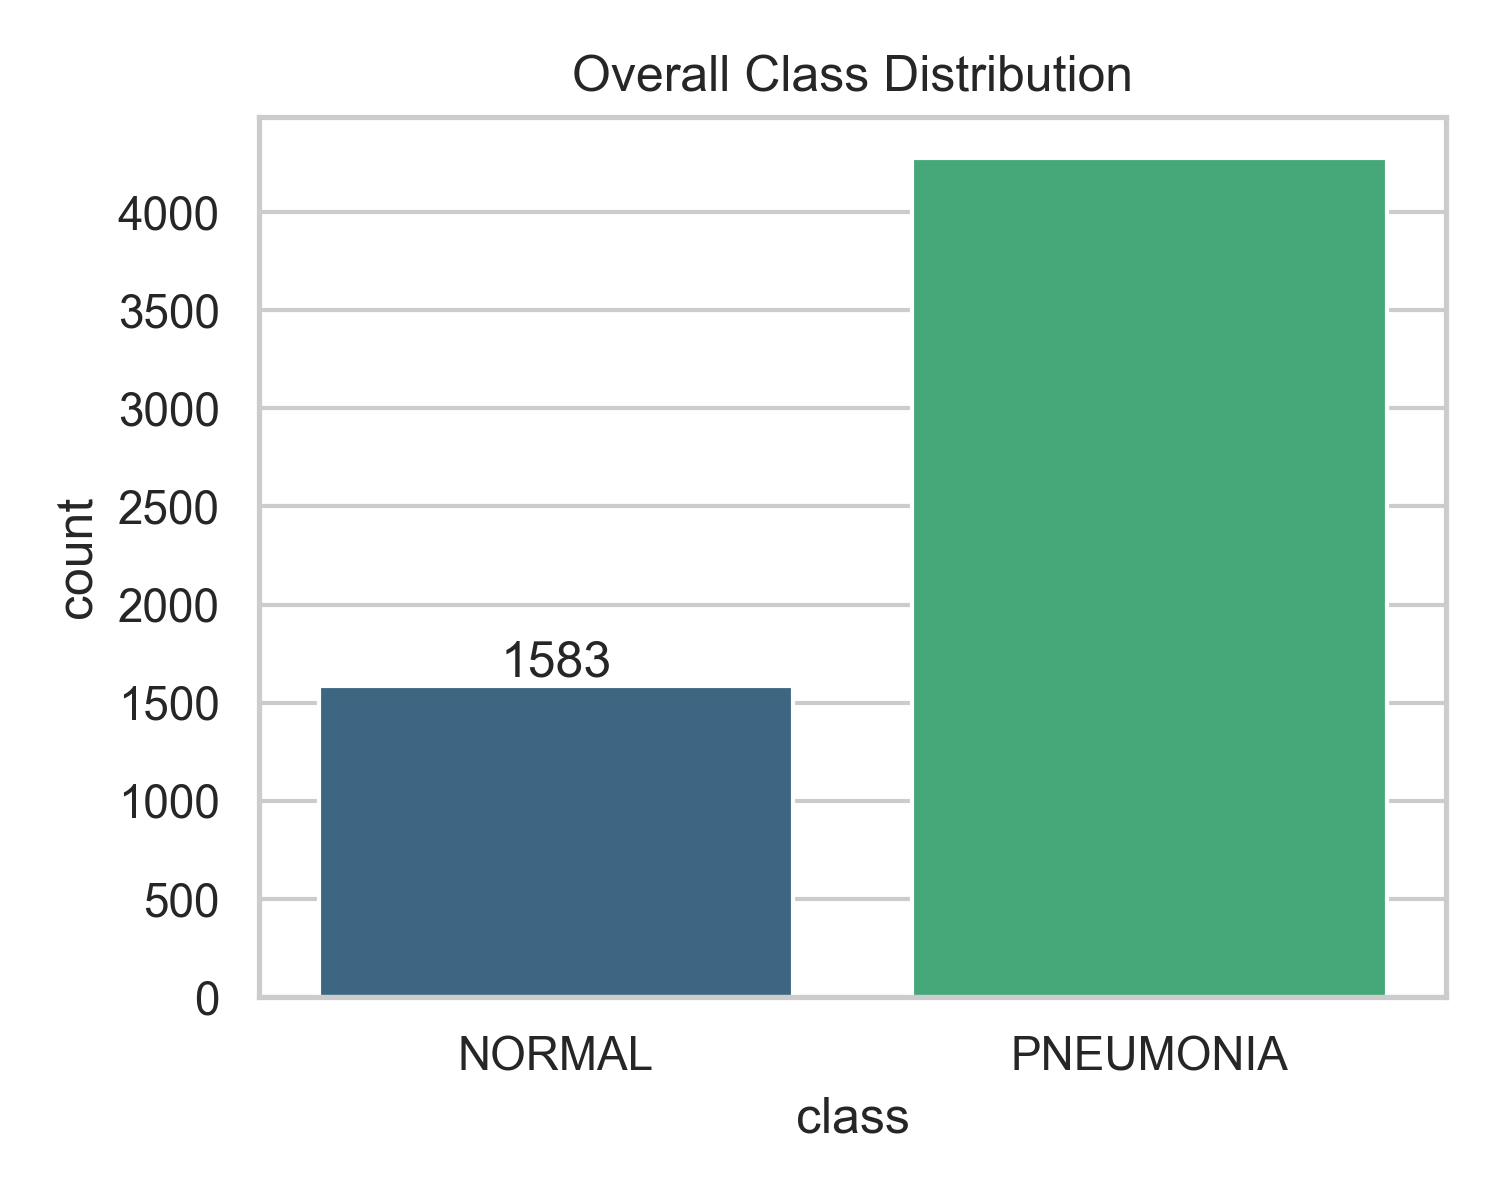

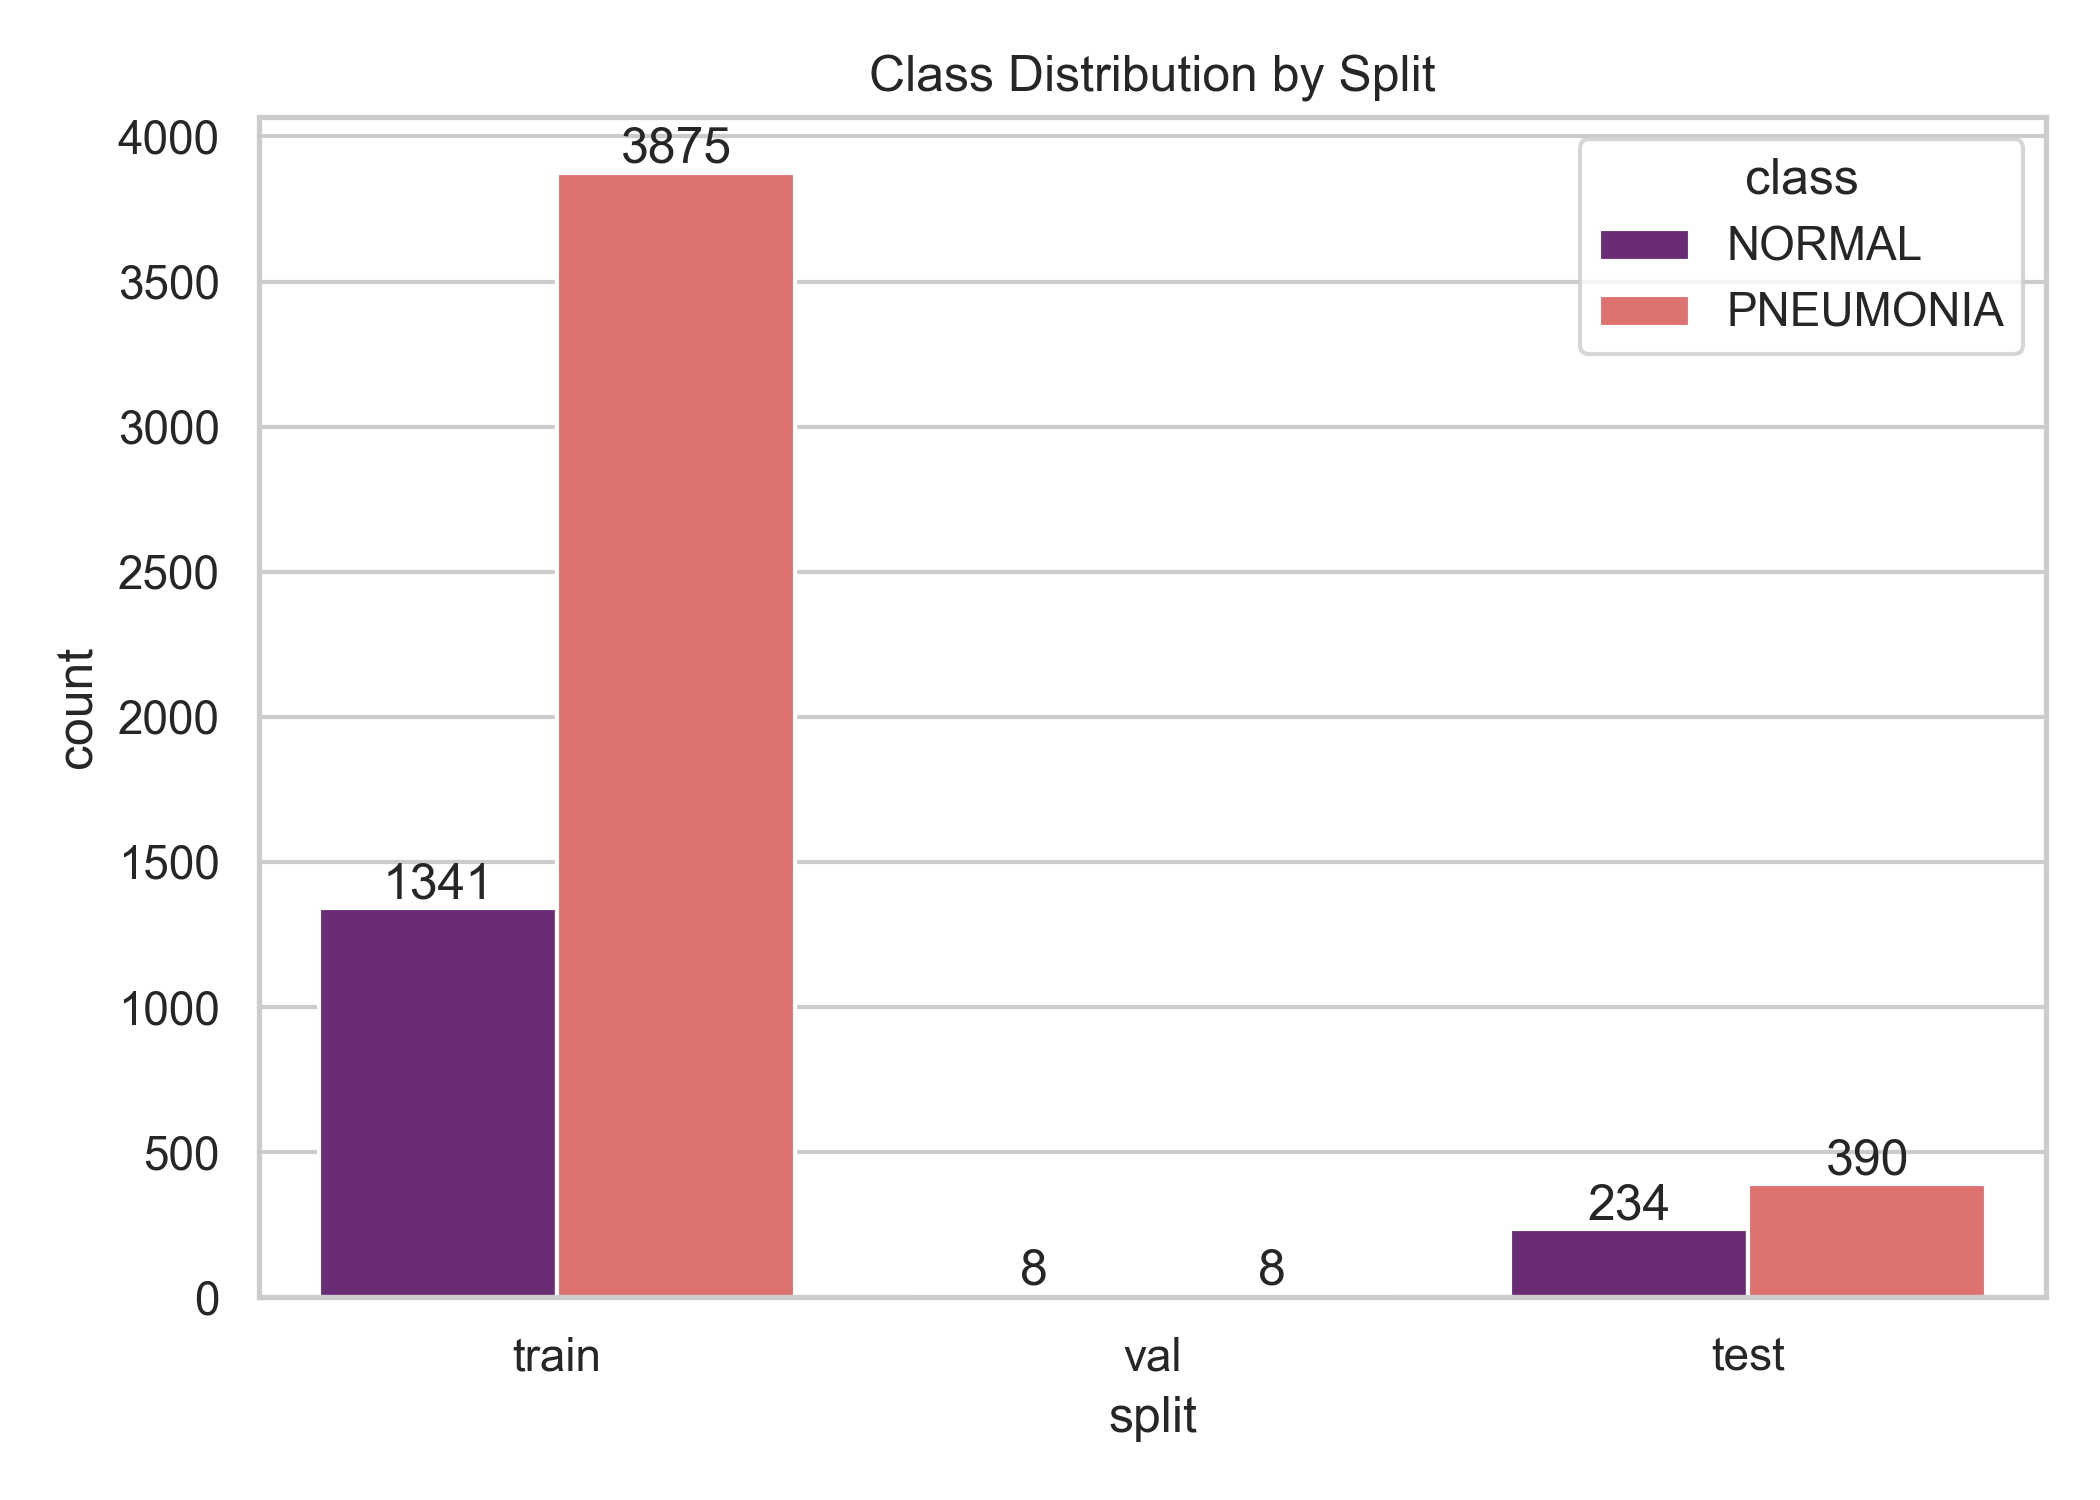

In [ ]:
def count_images(base_dir: Path) -> pd.DataFrame:
    """Walk through train/test/val and count images per class."""
    splits = ["train", "val", "test"]
    records = []
    for split in splits:
        split_dir = base_dir / split
        if not split_dir.exists():
            print(f"Warning: {split_dir} is missing")
            continue
        for cls_dir in sorted(split_dir.iterdir()):
            if not cls_dir.is_dir():
                continue
            count = len(list(cls_dir.glob("*.*")))
            records.append({"split": split, "class": cls_dir.name, "count": count})
            print(f"Found {count:4d} images in {split}/{cls_dir.name}")
    return pd.DataFrame(records)

# Count images
counts_df = count_images(DATA_DIR)
if counts_df.empty:
    raise ValueError("No images found. Check dataset path and contents.")

counts_df


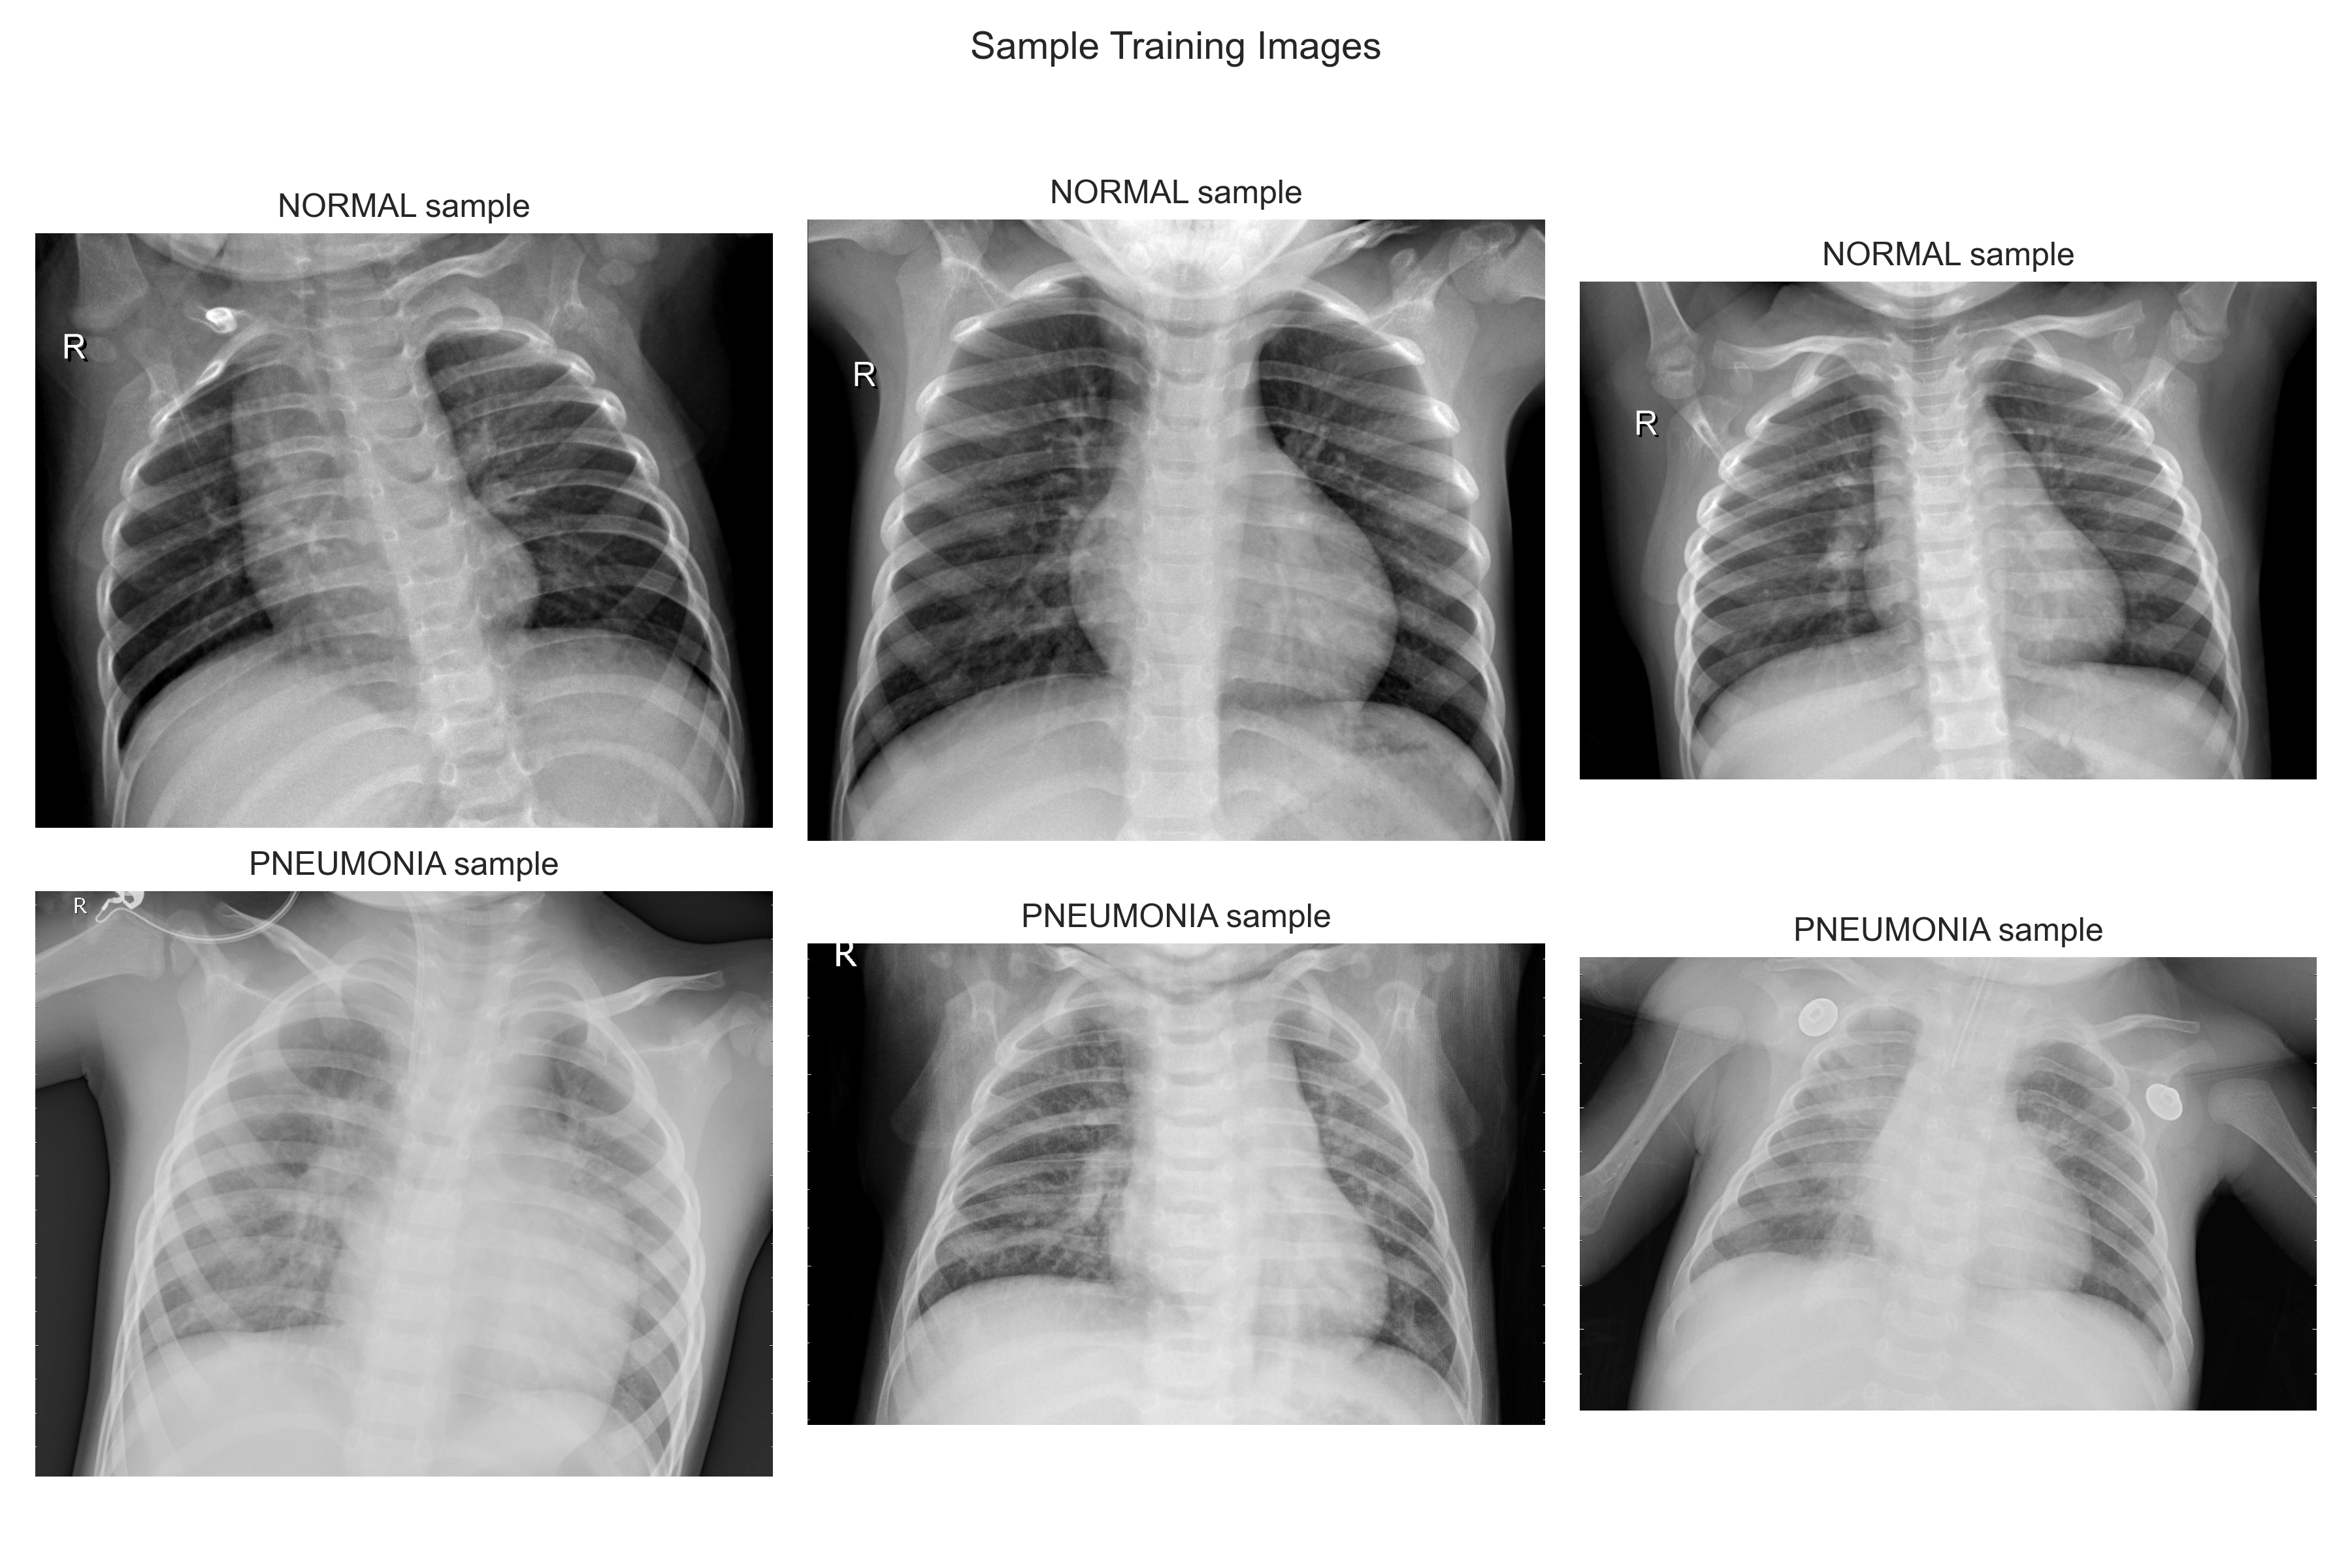

In [ ]:
# Overall class distribution (across all splits)
overall_counts = counts_df.groupby("class")["count"].sum().reset_index()
fig, ax = plt.subplots(figsize=(5, 4))
sns.barplot(data=overall_counts, x="class", y="count", palette="viridis", ax=ax)
ax.set_title("Overall Class Distribution")
ax.bar_label(ax.containers[0])
plt.tight_layout()
output_path = RESULTS_DIR / "class_distribution_overall.png"
plt.savefig(output_path, dpi=300)
print(f"Saved overall distribution to {output_path}")
plt.show()

# Per-split class distribution
fig, ax = plt.subplots(figsize=(7, 5))
sns.barplot(data=counts_df, x="split", y="count", hue="class", palette="magma", ax=ax)
ax.set_title("Class Distribution by Split")
for container in ax.containers:
    ax.bar_label(container)
plt.tight_layout()
output_path = RESULTS_DIR / "class_distribution_by_split.png"
plt.savefig(output_path, dpi=300)
print(f"Saved split distribution to {output_path}")
plt.show()


In [ ]:
random.seed(42)

# Sample images from the training set for quick visual inspection
def sample_images(base_dir: Path, class_name: str, n: int = 3):
    class_dir = base_dir / "train" / class_name
    images = list(class_dir.glob("*.*"))
    if len(images) < n:
        raise ValueError(f"Not enough images in {class_dir} to sample {n}")
    return random.sample(images, n)

try:
    n_samples = 3
    classes = ["NORMAL", "PNEUMONIA"]
    sampled_paths = {cls: sample_images(DATA_DIR, cls, n=n_samples) for cls in classes}

    fig, axes = plt.subplots(len(classes), n_samples, figsize=(4 * n_samples, 4 * len(classes)))
    for row, cls in enumerate(classes):
        for col, img_path in enumerate(sampled_paths[cls]):
            ax = axes[row, col]
            with Image.open(img_path) as img:
                ax.imshow(img, cmap="gray")
            ax.set_title(f"{cls} sample")
            ax.axis("off")
    plt.suptitle("Sample Training Images", fontsize=14)
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    output_path = RESULTS_DIR / "sample_training_images.png"
    plt.savefig(output_path, dpi=300)
    print(f"Saved sample grid to {output_path}")
    plt.show()
except Exception as exc:
    print(f"Could not generate sample images: {exc}")
